In [4]:
import os
import pandas as pd

# Define the paths to the folders containing the files
sunspot_folder = "/users/sampurnapradhan/Desktop/data_visualization/sunspot"  # Replace with your folder path
flare_folder = "/users/sampurnapradhan/Desktop/data_visualization/solarflare"      # Replace with your folder path

# Initialize lists to store DataFrames
sunspot_frames = []
flare_frames = []

# Function to read and process a single FWF file
def read_fwf_file(file_path):
    print(f"Processing file: {file_path}")
    return pd.read_fwf(file_path, header=None)  # Adjust header=None if no header row

# Process Sunspot Files
for file_name in os.listdir(sunspot_folder):
    if file_name.endswith(".txt"):  # Ensure it's a .txt file
        file_path = os.path.join(sunspot_folder, file_name)
        df = read_fwf_file(file_path)
        sunspot_frames.append(df)

# Process Flare Files
for file_name in os.listdir(flare_folder):
    if file_name.endswith(".txt"):  # Ensure it's a .txt file
        file_path = os.path.join(flare_folder, file_name)
        df = read_fwf_file(file_path)
        flare_frames.append(df)

# Concatenate all data into single DataFrames
sunspot_data = pd.concat(sunspot_frames, ignore_index=True)
flare_data = pd.concat(flare_frames, ignore_index=True)

# Save the merged data
sunspot_data.to_csv("/users/sampurnapradhan/Desktop/data_visualization/merged_sunspot_data.csv", index=False)
flare_data.to_csv("/users/sampurnapradhan/Desktop/data_visualization/erged_flare_data.csv", index=False)

print("Merging complete. Merged datasets saved as 'merged_sunspot_data.csv' and 'merged_flare_data.csv'.")


Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2001.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2015.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2014.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2000.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2016.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2002.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2003.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2013.txt
Processing file: /users/sampurnapradhan/Desktop/data_visualization/sunspot/usaf_solar-region-reports_2007.txt
Processing

In [8]:



# Define functions to decode dates
def decode_sunspot_date(date_column):
    """
    Decode sunspot dates formatted as `11YYMMDD`.
    Extract the last 6 characters representing `YYMMDD`.
    """
    extracted = date_column.astype(str).str[2:]  # Extract `YYMMDD`
    return pd.to_datetime(extracted, format='%y%m%d', errors='coerce')  # Decode as 2-digit year format

def decode_flare_date(date_column):
    """
    Decode flare dates formatted as `31777YYMMDDHHMM`.
    Extract the `YYMMDD` portion starting at the 5th character.
    """
    return pd.to_datetime(date_column.astype(str).str[5:11], format='%y%m%d', errors='coerce')

# Load the datasets
sunspot_file_path = '/users/sampurnapradhan/Desktop/data_visualization/merged_sunspot_data.csv'  # Replace with your file path
flare_file_path = '/users/sampurnapradhan/Desktop/data_visualization/merged_flare_data.csv'              # Replace with your file path

sunspot_data = pd.read_csv(sunspot_file_path, header=None)
flare_data = pd.read_csv(flare_file_path, header=None)

# Decode the `Date` fields
sunspot_data['DecodedDate'] = decode_sunspot_date(sunspot_data[0])
flare_data['DecodedDate'] = decode_flare_date(flare_data[0])

# Filter for valid decoded dates
sunspot_valid = sunspot_data.dropna(subset=["DecodedDate"])
flare_valid = flare_data.dropna(subset=["DecodedDate"])

# Find matching dates between the two datasets
matching_dates = set(sunspot_valid["DecodedDate"]).intersection(set(flare_valid["DecodedDate"]))

# Filter datasets to keep only rows with matching dates
sunspot_filtered = sunspot_valid[sunspot_valid["DecodedDate"].isin(matching_dates)]
flare_filtered = flare_valid[flare_valid["DecodedDate"].isin(matching_dates)]

# Save the filtered datasets (optional)
sunspot_filtered.to_csv("/users/sampurnapradhan/Desktop/data_visualization/filtered_sunspot_data.csv", index=False)
flare_filtered.to_csv("/users/sampurnapradhan/Desktop/data_visualization/filtered_flare_data.csv", index=False)

print("Filtered Sunspot Data:")
print(sunspot_filtered.head())

print("Filtered Flare Data:")
print(flare_filtered.head())



/var/folders/dd/j9rz49n92234gdwk4_2bygfh0000gn/T/ipykernel_22413/1952030854.py:21: DtypeWarning: Columns (0,6,7,8,9,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sunspot_data = pd.read_csv(sunspot_file_path, header=None)
/var/folders/dd/j9rz49n92234gdwk4_2bygfh0000gn/T/ipykernel_22413/1952030854.py:22: DtypeWarning: Columns (0,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  flare_data = pd.read_csv(flare_file_path, header=None)


Filtered Sunspot Data:
          0      1          2    3       4    5     6     7      8         9  \
1  11010101  110.0   S10W45 B  NaN  9283.0  DAO   7.0   8.0   80.0  001228.8   
2  11010101  110.0  S08E15 BG  NaN  9289.0  EKI  39.0  12.0  840.0  0101 2.2   
3  11010101  110.0   N30W19 B  NaN  9290.0  DSO   2.0   8.0   50.0  001230.6   
4  11010101  110.0   S12E05 B  NaN  9291.0  CAO   6.0   8.0   90.0  0101 1.4   
5  11010101  110.0   N25E48 A  NaN  9292.0  HRX   1.0   NaN    NaN  0101 4.8   

         10     11     12   13 DecodedDate  
1  001228.8  594.0  3LEAR  NaN  2001-01-01  
2  0101 2.2  600.0  3LEAR  NaN  2001-01-01  
3  001230.6  601.0  3LEAR  NaN  2001-01-01  
4  0101 1.2  604.0  3LEAR  NaN  2001-01-01  
5  0101 4.6  605.0  3LEAR  NaN  2001-01-01  
Filtered Flare Data:
             0                        1  2   3     4       5         6    7  \
1  31777890101  0001 0019D0007 N20W58SF  C  81  GOES  5290.0  881227.7  NaN   
2  31777890101    0353 0500 0420 S12W90  C  31 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets
sunspot_file = "/users/sampurnapradhan/Desktop/data_visualization/filtered_sunspot_data.csv"
flare_file = "/users/sampurnapradhan/Desktop/data_visualization/filtered_flare_data.csv"

# Step 1: Load and Inspect Data
sunspot_data = pd.read_csv(sunspot_file)
flare_data = pd.read_csv(flare_file)

# Step 2: Preprocessing
# Ensure DecodedDate is in datetime format
sunspot_data['DecodedDate'] = pd.to_datetime(sunspot_data['DecodedDate'], errors='coerce')
flare_data['DecodedDate'] = pd.to_datetime(flare_data['DecodedDate'], errors='coerce')

# Drop rows with invalid dates
sunspot_data.dropna(subset=['DecodedDate'], inplace=True)
flare_data.dropna(subset=['DecodedDate'], inplace=True)

# Remove duplicates if any
sunspot_data.drop_duplicates(inplace=True)
flare_data.drop_duplicates(inplace=True)



/var/folders/dd/j9rz49n92234gdwk4_2bygfh0000gn/T/ipykernel_22413/1022636721.py:11: DtypeWarning: Columns (0,6,7,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sunspot_data = pd.read_csv(sunspot_file)
/var/folders/dd/j9rz49n92234gdwk4_2bygfh0000gn/T/ipykernel_22413/1022636721.py:12: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  flare_data = pd.read_csv(flare_file)


In [12]:
# Inspect the first few rows and columns to confirm flare class location
print(flare_data.head())
print(flare_data.info())

# Identify column containing flare class information
flare_class_column = None
for col in flare_data.columns:
    if flare_data[col].dtype == 'object' and flare_data[col].str.contains('[CMX]', na=False).any():
        flare_class_column = col
        print(f"Flare class information found in column: {flare_class_column}")
        break

# If column identified, extract flare classes
if flare_class_column:
    flare_data['FlareClass'] = flare_data[flare_class_column].str[0]  # Extract first character (C, M, X)
    flare_data = flare_data[flare_data['FlareClass'].isin(['C', 'M', 'X'])]  # Filter valid classes
else:
    print("Flare class column not found. Please verify the dataset.")


             0                        1  2   3     4       5         6    7  \
0  31777890101  0001 0019D0007 N20W58SF  C  81  GOES  5290.0  881227.7  NaN   
1  31777890101    0353 0500 0420 S12W90  C  31  GOES  5295.0  881225.5  NaN   
2  31777890101  0612E0657D0620 S21W53SF  M  14  GOES  5292.0  881228.3  NaN   
3  31777890101  1052E1116D1103 S19W11SN  C  67  GOES  5303.0  881231.6  NaN   
4  31777890101  1121E1423D1337 N20W63SF  C  81  GOES  5290.0  881227.7  NaN   

     8    9   10  11  12 DecodedDate  
0  NaN  NaN  NaN NaN NaN  1989-01-01  
1  NaN  NaN  NaN NaN NaN  1989-01-01  
2  NaN  NaN  NaN NaN NaN  1989-01-01  
3  NaN  NaN  NaN NaN NaN  1989-01-01  
4  NaN  NaN  NaN NaN NaN  1989-01-01  
<class 'pandas.core.frame.DataFrame'>
Index: 67443 entries, 0 to 67738
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   0            67443 non-null  int64         
 1   1            67443 non-null  object

In [14]:
# Extract Flare Classes (C, M, X) from column '2'
flare_data['FlareClass'] = flare_data['2'].str[0]  # Extract first character (C, M, X)
flare_data = flare_data[flare_data['FlareClass'].isin(['C', 'M', 'X'])]  # Keep only valid flare classes

In [16]:
# Aggregate daily counts for sunspots and flares
sunspot_daily = sunspot_data.groupby('DecodedDate').size().reset_index(name='SunspotCount')
flare_daily = flare_data.groupby('DecodedDate').size().reset_index(name='FlareCount')

In [18]:
# Merge datasets on DecodedDate
merged_data = pd.merge(sunspot_daily, flare_daily, on='DecodedDate', how='outer').fillna(0)

In [20]:
# Feature Engineering
merged_data['SunspotLag1'] = merged_data['SunspotCount'].shift(1)
merged_data['SunspotLag2'] = merged_data['SunspotCount'].shift(2)
merged_data['SunspotRollingMean'] = merged_data['SunspotCount'].rolling(window=3).mean()


In [22]:
# Save Preprocessed Data
merged_data.to_csv("/users/sampurnapradhan/Desktop/data_visualization/preprocessed_data.csv", index=False)

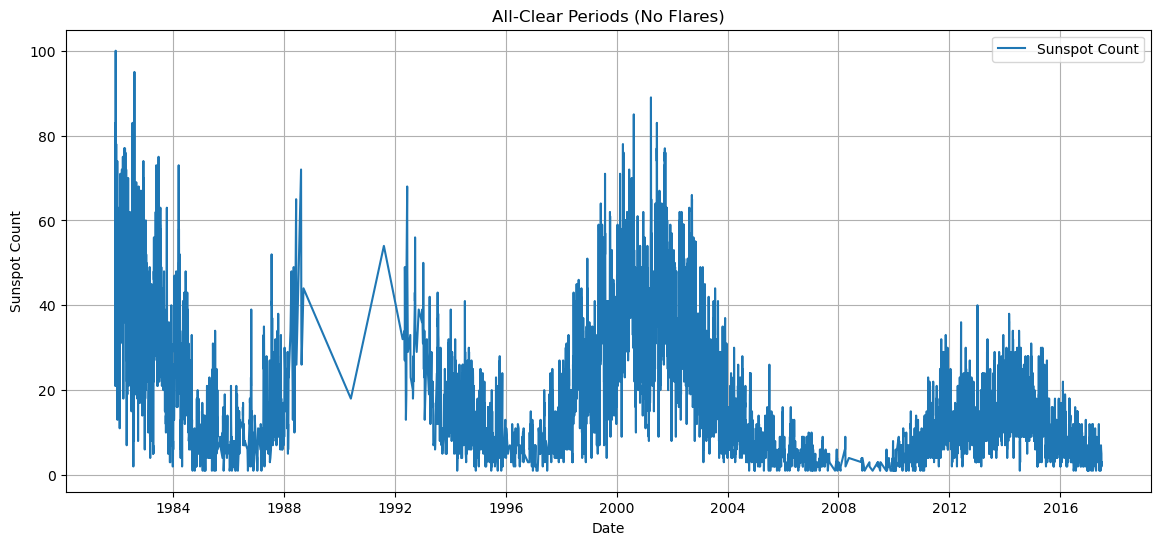

In [24]:
# 1. All-Clear Prediction (No Flares)
all_clear = merged_data[merged_data['FlareCount'] == 0]
plt.figure(figsize=(14, 6))
plt.plot(all_clear['DecodedDate'], all_clear['SunspotCount'], label="Sunspot Count")
plt.title("All-Clear Periods (No Flares)")
plt.xlabel("Date")
plt.ylabel("Sunspot Count")
plt.legend()
plt.grid(True)
plt.show()

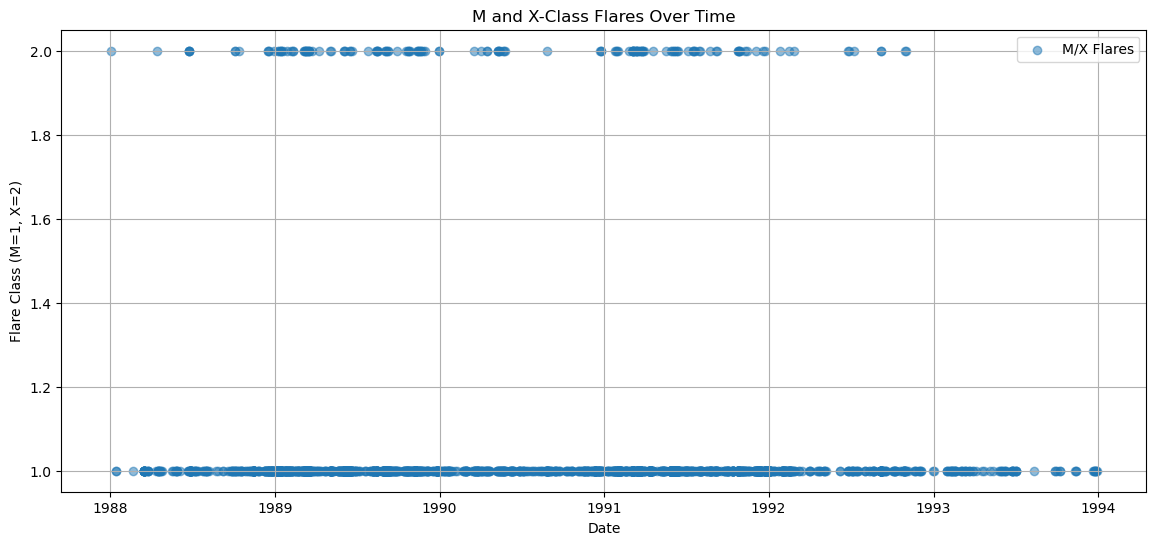

In [26]:
# 2. Significant Flares (M & X-Class)
significant_flares = flare_data[flare_data['FlareClass'].isin(['M', 'X'])]
plt.figure(figsize=(14, 6))
plt.scatter(significant_flares['DecodedDate'], significant_flares['FlareClass'].map({'M': 1, 'X': 2}), alpha=0.5, label="M/X Flares")
plt.title("M and X-Class Flares Over Time")
plt.xlabel("Date")
plt.ylabel("Flare Class (M=1, X=2)")
plt.legend()
plt.grid(True)
plt.show()

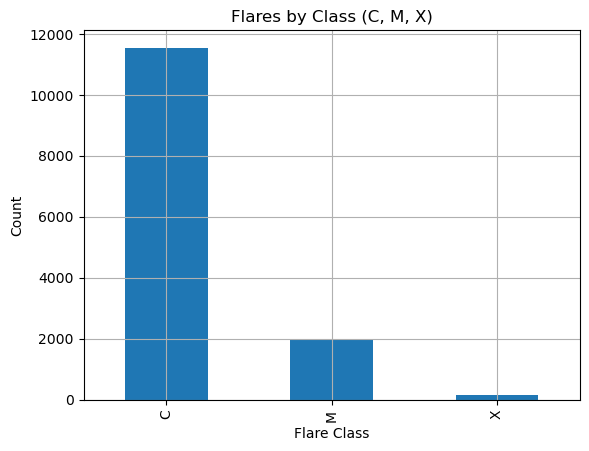

In [28]:
# 3. Flare Frequency by Class
flare_class_counts = flare_data['FlareClass'].value_counts()
flare_class_counts.plot(kind='bar', title="Flares by Class (C, M, X)", xlabel="Flare Class", ylabel="Count")
plt.grid(True)
plt.show()

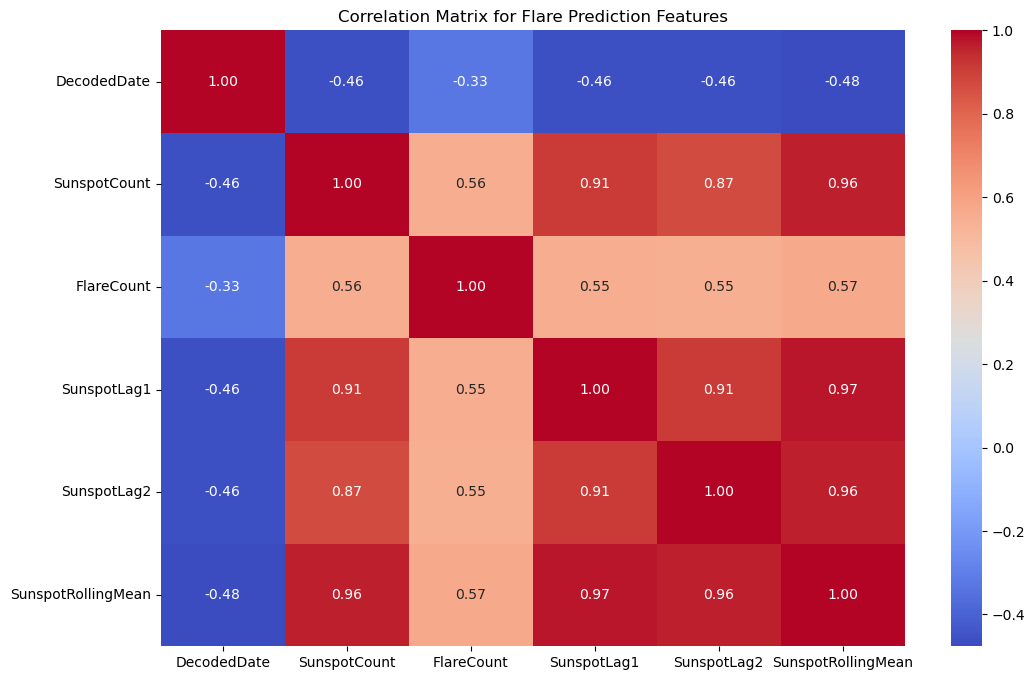

In [30]:
# 4. Important Features for Flare Occurrence
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix for Flare Prediction Features")
plt.show()

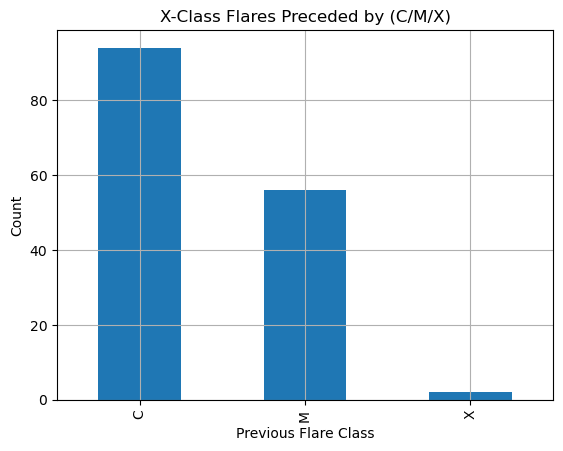

In [32]:
# 5. Are X-Class Flares Preceded by Less Significant Flares?
flare_data['PrevFlareClass'] = flare_data['FlareClass'].shift(1)
x_class_precursors = flare_data[flare_data['FlareClass'] == 'X']['PrevFlareClass'].value_counts()
x_class_precursors.plot(kind='bar', title="X-Class Flares Preceded by (C/M/X)", xlabel="Previous Flare Class", ylabel="Count")
plt.grid(True)
plt.show()

In [36]:
# 6. Produce Simplified Dataset
simplified_dataset = merged_data[['DecodedDate', 'SunspotCount', 'SunspotLag1', 'SunspotRollingMean', 'FlareCount']]
simplified_dataset.to_csv("/users/sampurnapradhan/Desktop/data_visualization/simplified_dataset.csv", index=False)

In [38]:
simplified_dataset.head()

,DecodedDate,SunspotCount,SunspotLag1,SunspotRollingMean,FlareCount
0,1981-12-01,61,NaN,NaN,0.0
1,1981-12-02,58,61.0,NaN,0.0
2,1981-12-03,21,58.0,46.666667,0.0
3,1981-12-04,67,21.0,48.666667,0.0
4,1981-12-05,83,67.0,57.000000,0.0


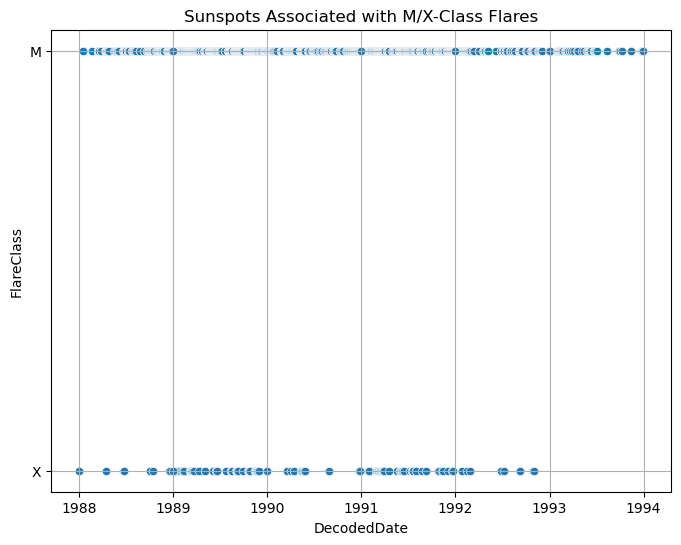

In [40]:
# 7. Sunspots Associated with Significant Flares
plt.figure(figsize=(8, 6))
sns.scatterplot(data=significant_flares, x='DecodedDate', y='FlareClass')
plt.title("Sunspots Associated with M/X-Class Flares")
plt.grid(True)
plt.show()

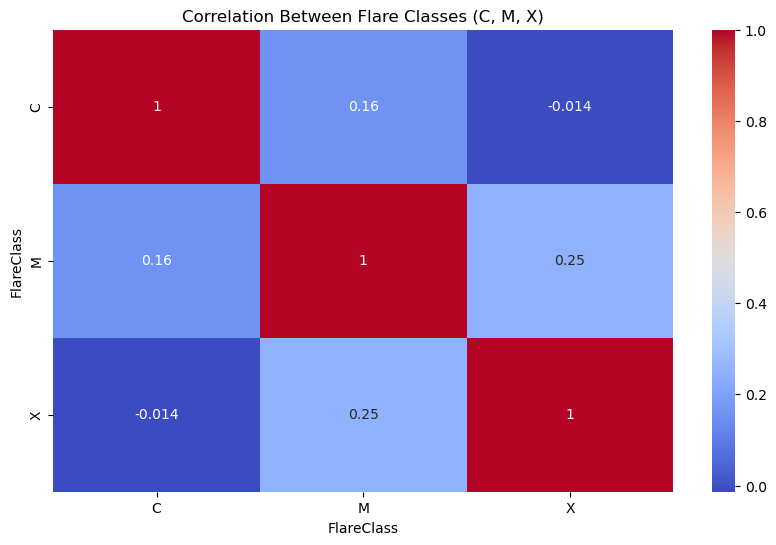

In [42]:
# 8. Relationship Between Flare Classes
flare_class_timeline = flare_data.groupby(['DecodedDate', 'FlareClass']).size().unstack(fill_value=0)
flare_class_relationship = flare_class_timeline.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(flare_class_relationship, annot=True, cmap="coolwarm")
plt.title("Correlation Between Flare Classes (C, M, X)")
plt.show()
